# V4 Distance Heuristic Results Visualization

This notebook loads and visualizes results from V4 distance heuristic training.

In [21]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

# Enable inline plotting
%matplotlib inline

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Load Results

Update the path below to point to your experiment output directory.

In [22]:
# Update this path to your experiment directory
results_dir = Path("/scratch/gpfs/TSILVER/de7281/shortcut_learning/outputs/heuristic_run_2025-12-05_02-19-55_job2760949")
results_path = results_dir / "heuristic_v4_results.pkl"

with open(results_path, 'rb') as f:
    results = pickle.load(f)

print(f"Loaded results from: {results_dir}")
print(f"Available keys: {list(results.keys())}")

Loaded results from: /scratch/gpfs/TSILVER/de7281/shortcut_learning/outputs/heuristic_run_2025-12-05_02-19-55_job2760949
Available keys: ['config', 'training_data', 'training_history', 'rollout_evaluation', 'distance_evaluation']


## Summary Statistics

In [23]:
print("="*80)
print("SUMMARY STATISTICS")
print("="*80)

# Configuration
print("\n[Configuration]")
cfg = results['config']
print(f"  Environment: {cfg['env_name']}")
print(f"  Grid size: {cfg['num_cells']}x{cfg['num_cells']}")
print(f"  Latent dimension: {cfg['latent_dim']}")
print(f"  Learning rate: {cfg['learning_rate']}")
print(f"  Batch size: {cfg['batch_size']}")
print(f"  Training epochs: {cfg['num_epochs']}")
print(f"  Trajectories per epoch: {cfg['trajectories_per_epoch']}")

# Training data
print("\n[Training Data]")
train_data = results['training_data']
print(f"  State-node pairs: {train_data['num_state_node_pairs']}")
print(f"  Number of nodes: {train_data['num_nodes']}")
print(f"  Number of edges: {train_data['num_edges']}")
print(f"  Number of shortcuts: {train_data['num_shortcuts']}")

# Rollout evaluation
print("\n[Rollout Evaluation]")
rollout_eval = results['rollout_evaluation']
print(f"  Success rate: {rollout_eval['success_rate']:.2f}%")
print(f"  Avg trajectory length: {rollout_eval['avg_length']:.1f}")
print(f"  Avg successful length: {rollout_eval['avg_success_length']:.1f}")

# Distance evaluation
print("\n[Distance Evaluation]")
dist_eval = results['distance_evaluation']
print(f"  MAE: {dist_eval['mae']:.3f}")
print(f"  RMSE: {dist_eval['rmse']:.3f}")
print(f"  Correlation: {dist_eval['correlation']:.3f}")

SUMMARY STATISTICS

[Configuration]
  Environment: GridworldFixedTAMPSystem
  Grid size: 3x3
  Latent dimension: 8
  Learning rate: 0.01
  Batch size: 256
  Training epochs: 500
  Trajectories per epoch: 10

[Training Data]
  State-node pairs: 4664
  Number of nodes: 9
  Number of edges: 24
  Number of shortcuts: 1545

[Rollout Evaluation]
  Success rate: 78.00%
  Avg trajectory length: 33.4
  Avg successful length: 14.4

[Distance Evaluation]
  MAE: 1034.335
  RMSE: 1176.024
  Correlation: 0.350


## Training History (if available)

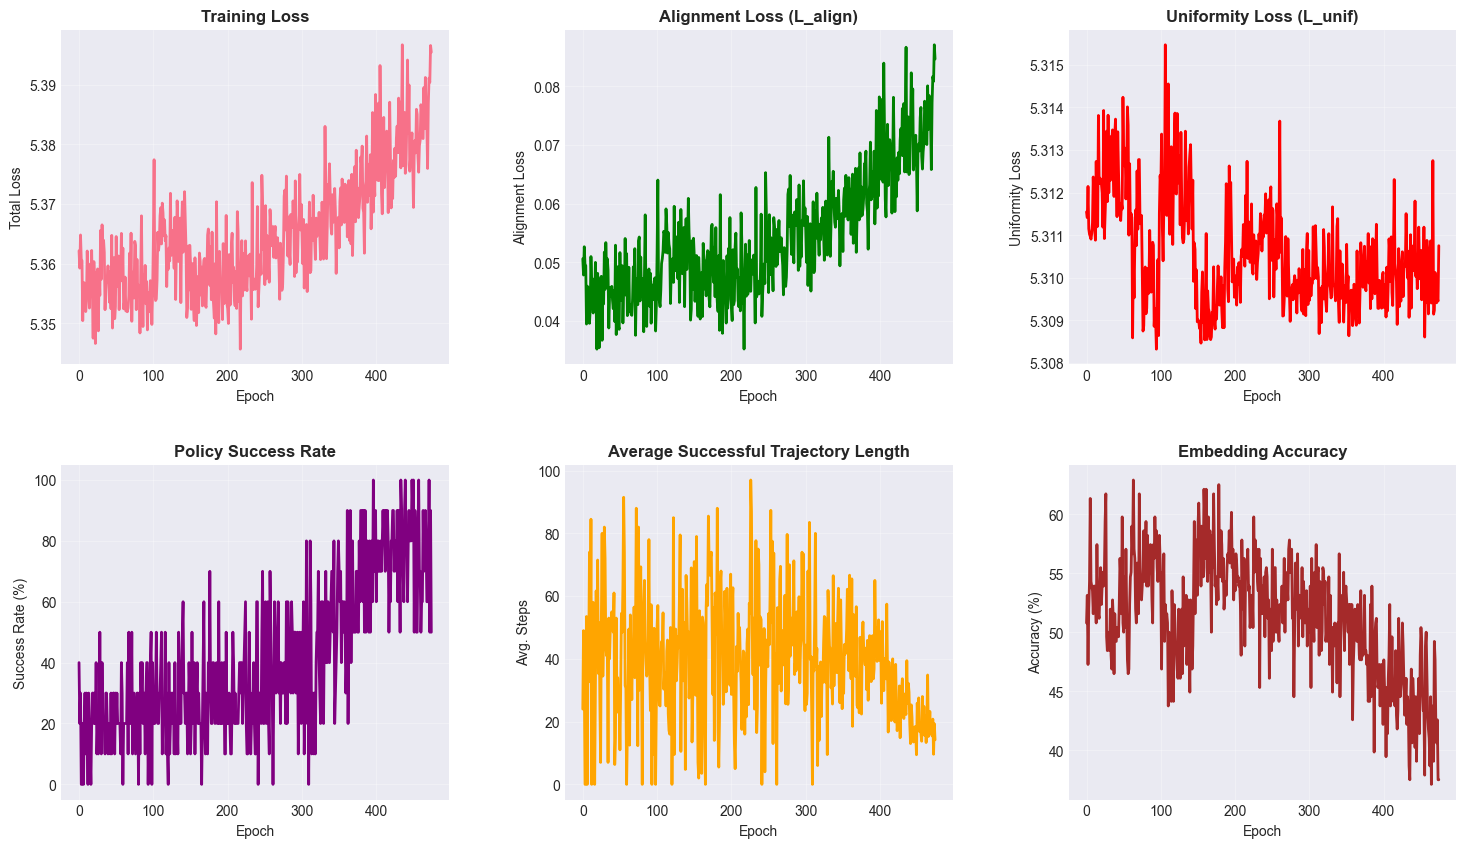

In [24]:
if 'training_history' in results and results['training_history']:
    history = results['training_history']
    
    fig = plt.figure(figsize=(18, 10))
    gs = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)
    
    epochs = np.arange(len(history['total_loss']))
    
    # Total Loss
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(epochs, history['total_loss'], linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Total Loss')
    ax1.set_title('Training Loss', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Alignment Loss
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(epochs, history['alignment_loss'], linewidth=2, color='green')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Alignment Loss')
    ax2.set_title('Alignment Loss (L_align)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Uniformity Loss
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.plot(epochs, history['uniformity_loss'], linewidth=2, color='red')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Uniformity Loss')
    ax3.set_title('Uniformity Loss (L_unif)', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Success Rate
    ax4 = fig.add_subplot(gs[1, 0])
    ax4.plot(epochs, np.array(history['success_rate']) * 100, linewidth=2, color='purple')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Success Rate (%)')
    ax4.set_title('Policy Success Rate', fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    # Avg Successful Length
    ax5 = fig.add_subplot(gs[1, 1])
    ax5.plot(epochs, history['avg_success_length'], linewidth=2, color='orange')
    ax5.set_xlabel('Epoch')
    ax5.set_ylabel('Avg. Steps')
    ax5.set_title('Average Successful Trajectory Length', fontweight='bold')
    ax5.grid(True, alpha=0.3)
    
    # Accuracy
    ax6 = fig.add_subplot(gs[1, 2])
    ax6.plot(epochs, np.array(history['accuracy']) * 100, linewidth=2, color='brown')
    ax6.set_xlabel('Epoch')
    ax6.set_ylabel('Accuracy (%)')
    ax6.set_title('Embedding Accuracy', fontweight='bold')
    ax6.grid(True, alpha=0.3)
    
    plt.show()
else:
    print("No training history available in results.")

## Distance Matrices - Heatmaps

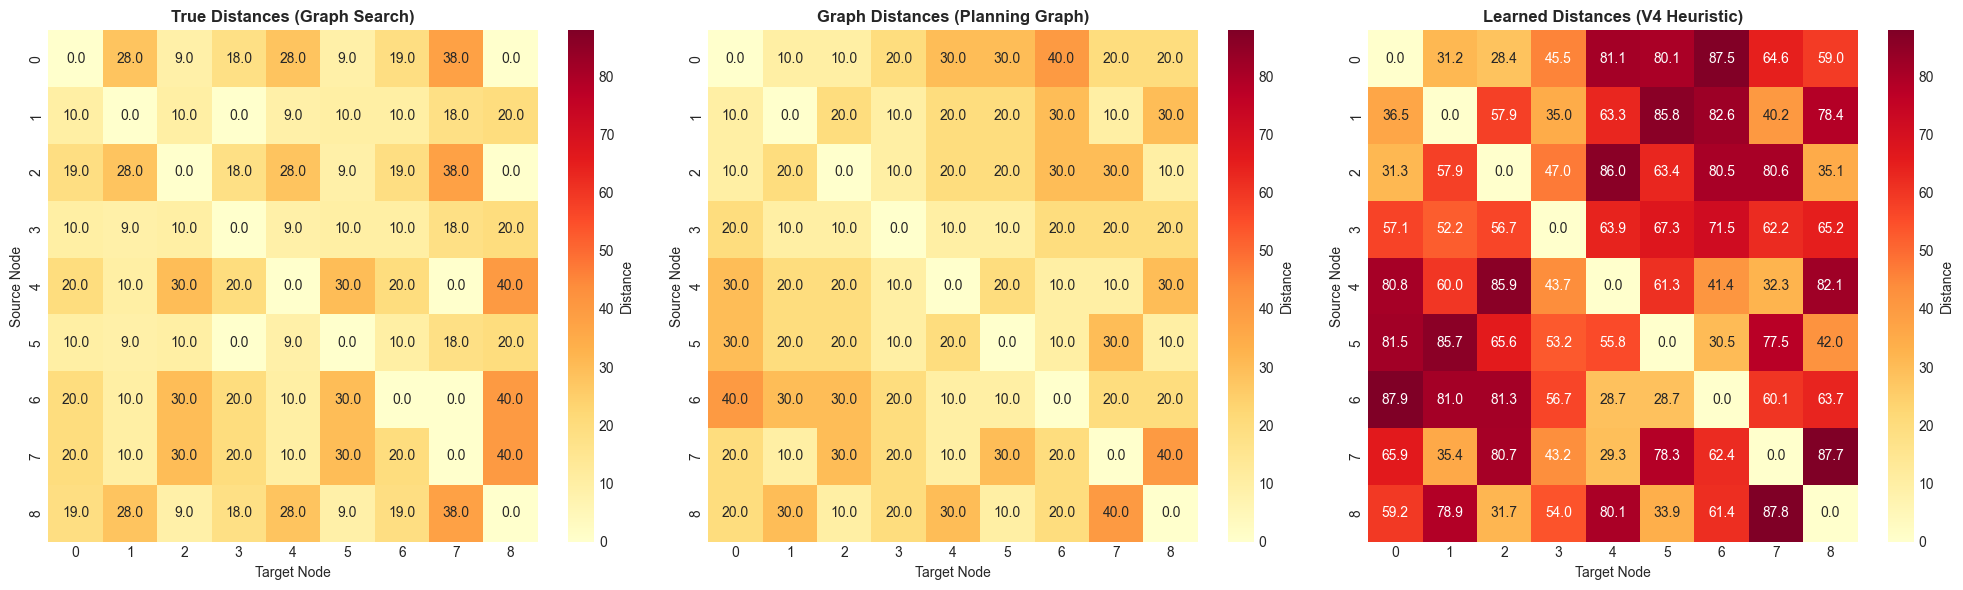

In [27]:
dist_eval = results['distance_evaluation']
true_distances = dist_eval['true_distances']
graph_distances = dist_eval['graph_distances']
# estimated_distances = dist_eval['estimated_distances']
estimated_distances = np.sqrt(np.maximum(dist_eval['estimated_distances'], 0)) * 2
node_ids = dist_eval['node_ids']

vmin = 0
vmax = max(np.nanmax(true_distances[np.isfinite(true_distances)]),
           np.nanmax(estimated_distances))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# True Distances
sns.heatmap(true_distances, annot=True, fmt='.1f', cmap='YlOrRd',
            xticklabels=node_ids, yticklabels=node_ids,
            vmin=vmin, vmax=vmax, cbar_kws={'label': 'Distance'}, ax=axes[0])
axes[0].set_title('True Distances (Graph Search)', fontweight='bold')
axes[0].set_xlabel('Target Node')
axes[0].set_ylabel('Source Node')

# Graph Distances
sns.heatmap(graph_distances, annot=True, fmt='.1f', cmap='YlOrRd',
            xticklabels=node_ids, yticklabels=node_ids,
            vmin=vmin, vmax=vmax, cbar_kws={'label': 'Distance'}, ax=axes[1])
axes[1].set_title('Graph Distances (Planning Graph)', fontweight='bold')
axes[1].set_xlabel('Target Node')
axes[1].set_ylabel('Source Node')

# Estimated Distances
sns.heatmap(estimated_distances, annot=True, fmt='.1f', cmap='YlOrRd',
            xticklabels=node_ids, yticklabels=node_ids,
            vmin=vmin, vmax=vmax, cbar_kws={'label': 'Distance'}, ax=axes[2])
axes[2].set_title('Learned Distances (V4 Heuristic)', fontweight='bold')
axes[2].set_xlabel('Target Node')
axes[2].set_ylabel('Source Node')

plt.tight_layout()
plt.show()

## Distance Comparison - Scatterplots

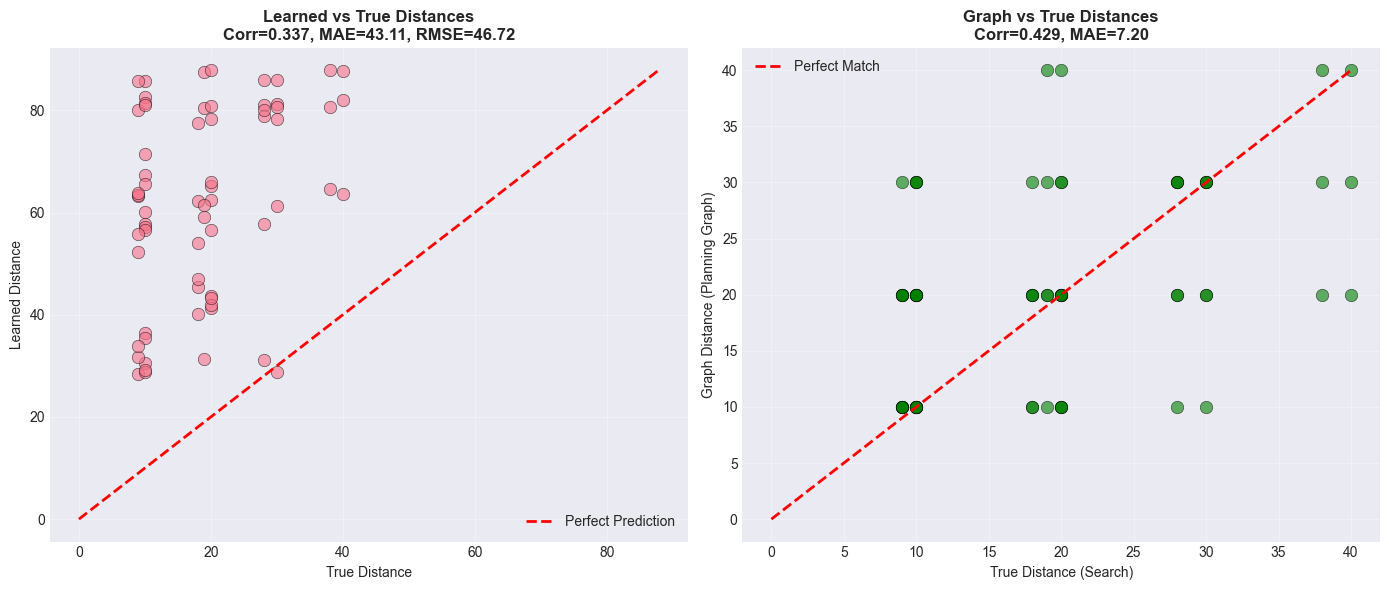

In [28]:
valid_mask = np.isfinite(true_distances) & (true_distances > 0)
valid_indices = np.where(valid_mask)

true_flat = true_distances[valid_indices]
graph_flat = graph_distances[valid_indices]
estimated_flat = estimated_distances[valid_indices]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Learned vs True
axes[0].scatter(true_flat, estimated_flat, alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
max_val = max(np.max(true_flat), np.max(estimated_flat))
axes[0].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Prediction')

corr = np.corrcoef(true_flat, estimated_flat)[0, 1]
mae = np.mean(np.abs(estimated_flat - true_flat))
rmse = np.sqrt(np.mean((estimated_flat - true_flat)**2))

axes[0].set_xlabel('True Distance')
axes[0].set_ylabel('Learned Distance')
axes[0].set_title(f'Learned vs True Distances\nCorr={corr:.3f}, MAE={mae:.2f}, RMSE={rmse:.2f}',
                  fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graph vs True
axes[1].scatter(true_flat, graph_flat, alpha=0.6, s=80, color='green',
                edgecolors='black', linewidth=0.5)
max_val = max(np.max(true_flat), np.max(graph_flat))
axes[1].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Match')

corr_graph = np.corrcoef(true_flat, graph_flat)[0, 1]
mae_graph = np.mean(np.abs(graph_flat - true_flat))

axes[1].set_xlabel('True Distance (Search)')
axes[1].set_ylabel('Graph Distance (Planning Graph)')
axes[1].set_title(f'Graph vs True Distances\nCorr={corr_graph:.3f}, MAE={mae_graph:.2f}',
                  fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Distance Error Heatmap

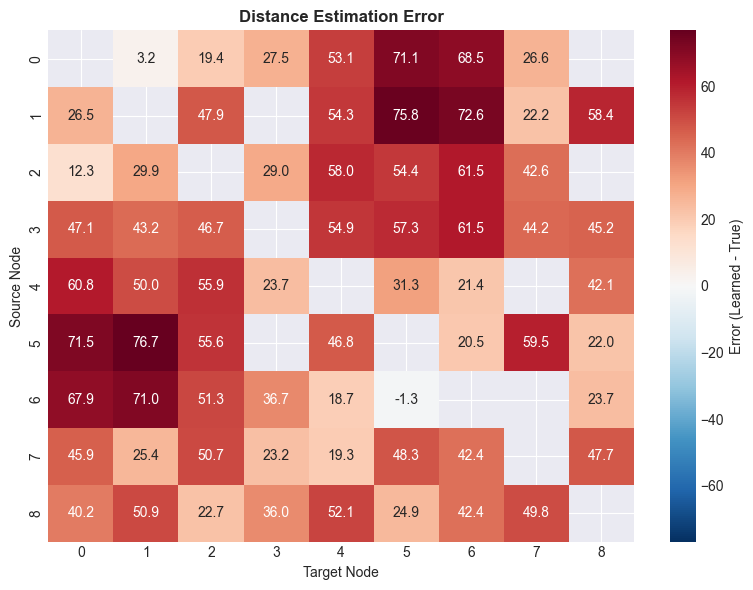

In [29]:
error_matrix = estimated_distances - true_distances
error_matrix[~valid_mask] = np.nan

max_error = np.nanmax(np.abs(error_matrix))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(error_matrix, annot=True, fmt='.1f', cmap='RdBu_r', center=0,
            xticklabels=node_ids, yticklabels=node_ids,
            vmin=-max_error, vmax=max_error,
            cbar_kws={'label': 'Error (Learned - True)'}, ax=ax)
ax.set_title('Distance Estimation Error', fontweight='bold')
ax.set_xlabel('Target Node')
ax.set_ylabel('Source Node')

plt.tight_layout()
plt.show()

## Rollout Analysis

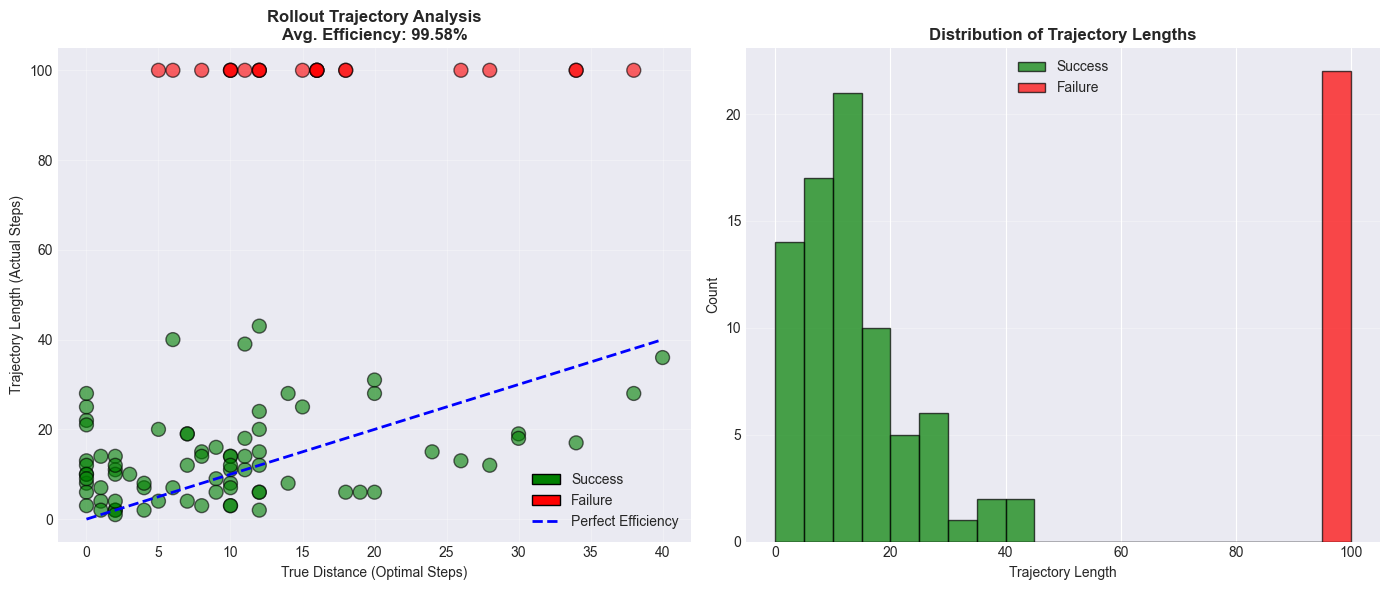

In [30]:
rollout_eval = results['rollout_evaluation']
rollout_results = rollout_eval['rollout_results']

trajectory_lengths = [r['trajectory_length'] for r in rollout_results]
true_lengths = [r['true_length'] for r in rollout_results]
successes = [r['success'] for r in rollout_results]

trajectory_lengths = np.array(trajectory_lengths)
true_lengths = np.array(true_lengths)
successes = np.array(successes)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Trajectory length vs True length
colors = ['green' if s else 'red' for s in successes]
axes[0].scatter(true_lengths, trajectory_lengths, c=colors, alpha=0.6, s=100,
                edgecolors='black', linewidth=1)

max_val = max(np.max(true_lengths), np.max(trajectory_lengths))
axes[0].plot([0, np.max(true_lengths)], [0, np.max(true_lengths)], 'b--', linewidth=2, label='Perfect Efficiency')

legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Success'),
    Patch(facecolor='red', edgecolor='black', label='Failure'),
    plt.Line2D([0], [0], color='b', linestyle='--', linewidth=2, label='Perfect Efficiency')
]
axes[0].legend(handles=legend_elements)

success_mask = successes == True
if success_mask.any():
    efficiency = true_lengths[success_mask] / trajectory_lengths[success_mask]
    avg_efficiency = np.mean(efficiency)
    axes[0].set_title(f'Rollout Trajectory Analysis\nAvg. Efficiency: {avg_efficiency:.2%}',
                      fontweight='bold')
else:
    axes[0].set_title('Rollout Trajectory Analysis', fontweight='bold')

axes[0].set_xlabel('True Distance (Optimal Steps)')
axes[0].set_ylabel('Trajectory Length (Actual Steps)')
axes[0].grid(True, alpha=0.3)

# Distribution of trajectory lengths
success_lengths = trajectory_lengths[success_mask]
failure_lengths = trajectory_lengths[~success_mask]

bins = np.arange(0, max(trajectory_lengths) + 5, 5)
axes[1].hist(success_lengths, bins=bins, alpha=0.7, color='green',
             label='Success', edgecolor='black')
axes[1].hist(failure_lengths, bins=bins, alpha=0.7, color='red',
             label='Failure', edgecolor='black')

axes[1].set_xlabel('Trajectory Length')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Trajectory Lengths', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [36]:
for r in rollout_results:
    if not r['success'] and r['true_length'] < 10:
        print(r)
        

{'start_state': GraphInstance(nodes=array([[5., 8.]], dtype=float32), edges=None, edge_links=None), 'start_node': 7, 'goal_node': 1, 'trajectory_length': 100, 'success': False, 'true_length': 5.0, 'all_states': [array([5., 8.], dtype=float32), array([4., 8.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtype=float32), array([4., 7.], dtyp

In [20]:
true_distances

array([[ 0., 26.,  8., 16., 26.,  8., 18., 36.,  0.],
       [10.,  0., 10.,  0.,  9., 10., 10., 18., 20.],
       [19., 28.,  0., 18., 28.,  9., 19., 38.,  0.],
       [10.,  9., 10.,  0.,  9., 10., 10., 18., 20.],
       [20., 10., 30., 20.,  0., 30., 20.,  0., 40.],
       [10.,  9., 10.,  0.,  9.,  0., 10., 18., 20.],
       [20., 10., 30., 20., 10., 30.,  0.,  0., 40.],
       [20., 10., 30., 20., 10., 30., 20.,  0., 40.],
       [17., 24.,  7., 14., 24.,  7., 17., 34.,  0.]])